# <center> Monte Carlo Simulation of TSLA Stock Prices <center>

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import datetime 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use('ggplot')

In [2]:
start = datetime.datetime(2020, 1, 1, 0, 0)
end = datetime.datetime.now()
prices = data.DataReader("TSLA", 'yahoo', start, end)['Close']

In [3]:
returns = prices.pct_change()

In [4]:
last_price = prices[-1]

In [5]:
num_simulations = 1000
num_days = 252

In [6]:
simulation_df = pd.DataFrame()

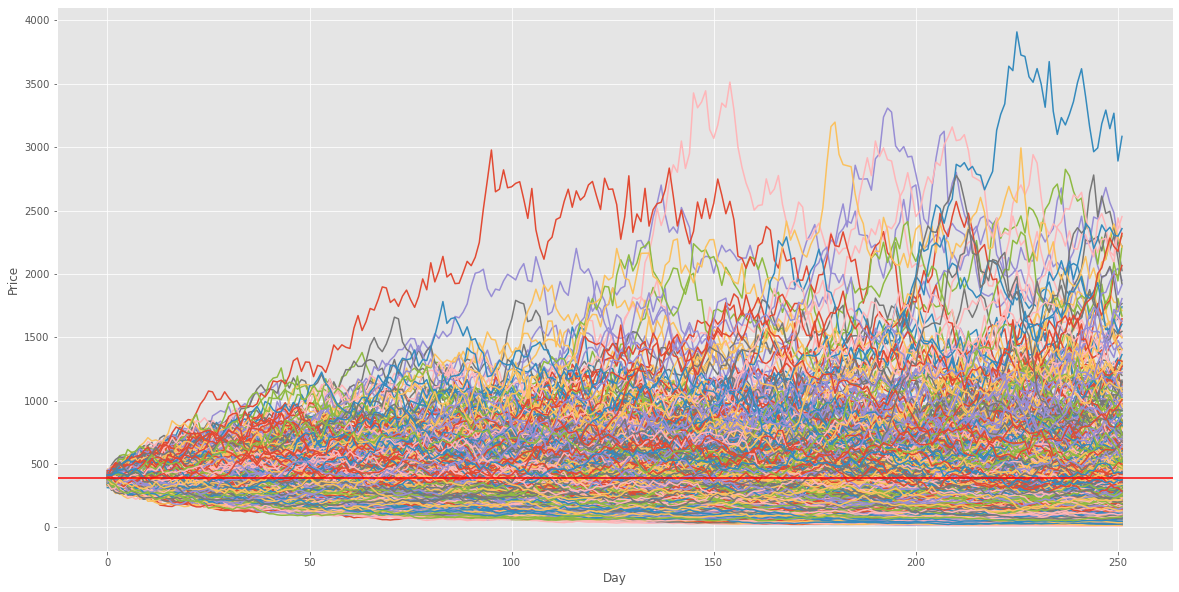

In [7]:
for x in range(num_simulations) :
    count = 0
    daily_vol = returns.std()
    price_series = []
    price = last_price * (1 + np.random.normal(0, daily_vol))
    price_series.append(price)
    for y in range(num_days) : 
        if count == 251:
            break
        price = price_series[count] * (1 + np.random.normal(0, daily_vol))
        price_series.append(price)
        count += 1
    
    simulation_df[x] = price_series        
    
fig = plt.figure(figsize = (20, 10))
plt.plot(simulation_df)
plt.rcParams["figure.figsize"] = [16,9]
plt.axhline(y = last_price, color = 'r', linestyle = '-')
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()

Text(0, 0.5, 'Days')

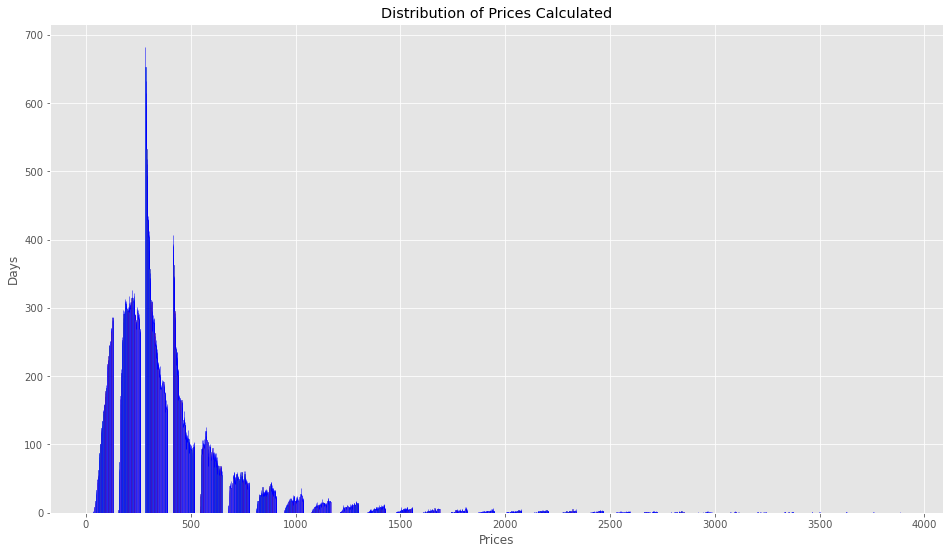

In [11]:
plt.title('Distribution of Prices Calculated')
plt.hist(simulation_df, bins = 30, ec = 'blue')
plt.xlabel('Prices')
plt.ylabel('Days')